#### 1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?
It's more probable to roll sevens with a snake eyes to sevens ratio of 1:6 (due to 1 possible roll for snake eyes and 6 possible rolls that result in sevens).
#### 2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).
6 * 6 = 36 possible outcomes
P(2) = P(12) = P(1) * P(1) = 1/6 * 1/6 = 1/36  
P(3) = P(11) = P(1) * P(2) + P(2) * P(1) = 1/6 * 1/6 * 2 = 2/36  
P(4) = P(10) = P(1) * P(3) * 3 b/c 3 possibilities for rolls that work = 3/36  
P(5) = P(9) = P(1) * P(4) * 4 b/c 4 possibilities for rolls that work = 4/36  
P(6) = P(8) = P(1) * P(5) * 5 b/c 5 possibilities for rolls that work = 5/36  
P(7) = P(1) * P(6) * 6 b/c 6 possibilities for rolls that work = 6/36

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


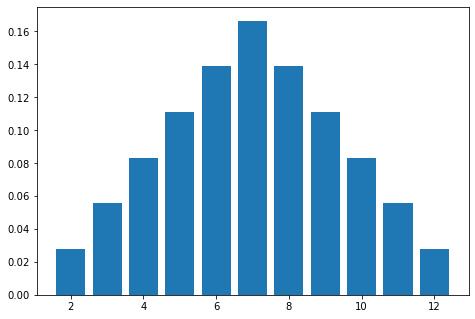

In [1]:
import numpy as np
import matplotlib.pyplot as plt
p1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
p2 = p1
num_dice = 2

for i in range(num_dice - 1):
    con = np.convolve(p1, p2)
    p1 = con

print(p1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2,13), p1)
plt.show()

#### 3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

In [2]:
a = []
for i1 in range(1,7):
    for i2 in range(1,7):
        a.append(i1+i2)
mean = sum(a) / len(a)
print("Mean = " + str(mean))

var = np.var(a)
print("Variance = " + str(var))

Mean = 7.0
Variance = 5.833333333333333


#### 4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.
6^10 possible outcomes, ranging from 1*10 to 6 * 10, or 10 to 60  
P(10) = P(60) = 1 possible way to get it = 1/6^10  
P(11) = P(59) = 10 possible ways to get it = 10/6^10  
P(12) = P(58) = 10 * 10 - 10 + 10 * 10 - 10 = 180 possible ways to get it  
and so on

In [ ]:
p1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
p2 = p1
num_dice = 10

for i in range(num_dice - 1):
    con = np.convolve(p1, p2)
    p1 = con

print("List of probabilities from 10 to 60 are: \n" + str(p1))

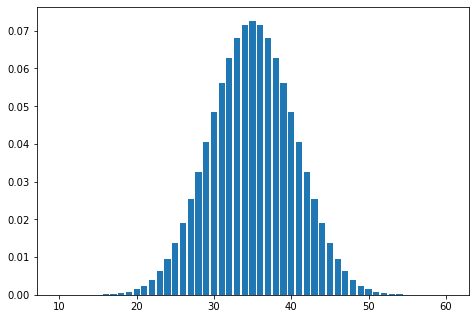

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(10,61), p1)
plt.show()

It's not necessarily a Gaussian distribution, but according to the central limit theorem it approaches one as more trials are used.

#### 5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

Combined data from 1000 Gaussians with a mean of 5, standard deviation of 2, and 10 values
Standard deviation of sums is: 6.065925911677213
Standard deviation of averages is: 0.6065925911677212


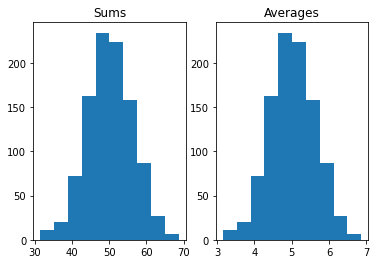

In [6]:
# Use random.normal() to get Gaussian data
import statistics as stat

sums = []
averages = []
for i in range(1000):
    dist = np.random.normal(5, 2, 10)
    sums.append(sum(dist))
    averages.append(sum(dist) / len(dist))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(sums)
ax1.set_title("Sums")
ax2.hist(averages)
ax2.set_title("Averages")
print("Combined data from 1000 Gaussians with a mean of 5, standard deviation of 2, and 10 values")
print("Standard deviation of sums is: " + str(stat.pstdev(sums)))
print("Standard deviation of averages is: " + str(stat.pstdev(averages)))

The standard deviaition of the sum increases with multiple trials but the but the standard deviation of the average decreases with multiple trials. This means that integrating a signal over time will have a larger standard deviation but averaging multiple signals can lower the standard deviation.